In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
%matplotlib inline  
#shows plot right the below the code cell

from colossus.cosmology import cosmology 
cosmo = cosmology.setCosmology('planck18') # set cosmology to Planck 2018

import matplotlib 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'
matplotlib.rcParams['font.size'] = 16

from galpy.potential import MiyamotoNagaiPotential, PlummerPotential #using galpy for potential descirbing the baryonic profile

from matplotlib import interactive
interactive(True)


## DM profiles

- Using DM profile from Colossus and assuming a "given" baryonic contriubtion to the total circular velocity.   

- We then fit the total ciruclar velocity (rotation curve) for the NFW + infall model assuming the baryonic contribution is known. To do that we use the fit method of colossus.  
 
- Qunatities we can fit using colossus.fit are density or mass enclosed or surface density. So we will convert our rotation curve data, $(r, v_c, \Delta v)$ to $(r, \rho_{dm}, \Delta \rho_{dm})$, using $M_{dm}(r) = r\,v_{dm}^2(r)/G$, where $v_{dm} = \sqrt{v_c^2 - v_{bary}^2}$ and $\rho_{dm} = M_{dm} \frac{4}{3}\pi r^3$

- The available fitting methods are leastsq and mcmc. Here we use the leastsq method to save time. mcmc could be performed similarly. 

These codes are based on the Colossus tutorial in https://bdiemer.bitbucket.io/colossus/

Mean density (rho_mean) =  86.34164473613976 (Msun h^2 kpc^-3)    (The matter density of the universe at redshift z=0.0)
NFW: OrderedDict({'rhos': 6378795.928070417, 'rs': 20.311309856581044})
DK14: OrderedDict({'rhos': 1469527.4991789383, 'rs': 20.31130985658104, 'rt': 434.7741388785323, 'alpha': 0.16127530367457624, 'beta': 4.0, 'gamma': 8.0})
D23: OrderedDict({'rhos': 1546932.032461308, 'rs': 20.311309856581037, 'rt': 303.91481493355593, 'alpha': 0.18, 'beta': 3.0})
Einasto: OrderedDict({'rhos': 1450301.4387155238, 'rs': 20.311309856581044, 'alpha': 0.1610981005232897})


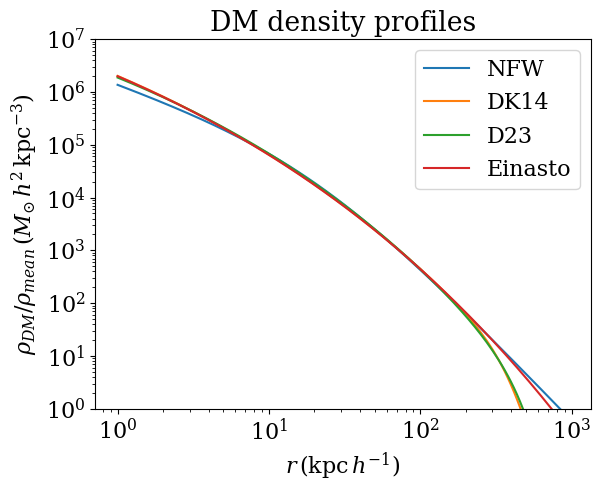

In [24]:
from colossus.halo import profile_dk14
from colossus.halo import profile_nfw
from colossus.halo import profile_diemer23
from colossus.halo import profile_einasto

Mvir = 1e12 
cvir = 10.0 
z = 0.0 
p_dk14 = profile_dk14.DK14Profile(M=Mvir, c=cvir, z=z, mdef='vir')
p_nfw = profile_nfw.NFWProfile(M=Mvir, c=cvir, z=z, mdef='vir')
p_d23 = profile_diemer23.ModelAProfile(M=Mvir, c=cvir, z=z, mdef='vir')
p_ens = profile_einasto.EinastoProfile(M=Mvir, c=cvir, z=z, mdef='vir')

r = 10**np.arange(0, 3, 0.02)
rho_m = cosmo.rho_m(z)
rho_dk14 = p_dk14.density(r)
rho_nfw = p_nfw.density(r)
rho_d23 = p_d23.density(r)
rho_ens = p_ens.density(r)
print ('Mean density (rho_mean) = ', rho_m, f'(Msun h^2 kpc^-3)    (The matter density of the universe at redshift z={z})')

print ('NFW:', p_nfw.par)
print ('DK14:', p_dk14.par)
print ('D23:', p_d23.par)
print ('Einasto:', p_ens.par)

plt.figure()
plt.loglog()
plt.xlabel(r"$r\, (\mathrm{kpc} \, h^{-1})$")
plt.ylabel(r"$\rho_{DM} / \rho_{mean} \, (M_{\odot} \, h^2 \, \mathrm{kpc}^{-3})$")
plt.plot(r, rho_nfw / rho_m, '-', label='NFW')
plt.plot(r, rho_dk14 / rho_m, '-', label = 'DK14');
plt.plot(r, rho_d23 / rho_m, '-', label='D23')
plt.plot(r, rho_ens / rho_m, '-', label='Einasto');
plt.ylim(1E0, 1E7)
plt.title('DM density profiles')
plt.legend();


In [25]:
from collections import OrderedDict

if __name__ == '__main__':
    # Store the given data
    mean_density = 86.34164473613976  # (Msun h^2 kpc^-3)
    profile_data = {
        'NFW': OrderedDict([('rhos', 6378795.928070417), ('rs', 20.311309856581044)]),
        'DK14': OrderedDict([('rhos', 1469527.4991789383), ('rs', 20.31130985658104), ('rt', 434.7741388785323),
                         ('alpha', 0.16127530367457624), ('beta', 4.0), ('gamma', 8.0)]),
        'D23': OrderedDict([('rhos', 1546932.032461308), ('rs', 20.311309856581037), ('rt', 303.91481493355593),
                         ('alpha', 0.18), ('beta', 3.0)]),
        'Einasto': OrderedDict([('rhos', 1450301.4387155238), ('rs', 20.311309856581044), ('alpha', 0.1610981005232897)])
    }

    # Print the data
    print("Dark Matter Halo Profile Data:")
    print("--------------------------------")
    print(f"Mean Density (rho_mean): {mean_density:.4f} (Msun h^2 kpc^-3)")
    print("--------------------------------")

    for profile_name, data in profile_data.items():
        print(f"\n{profile_name} Profile:")
        for param, value in data.items():
            print(f"  {param}: {value}") 

Dark Matter Halo Profile Data:
--------------------------------
Mean Density (rho_mean): 86.3416 (Msun h^2 kpc^-3)
--------------------------------

NFW Profile:
  rhos: 6378795.928070417
  rs: 20.311309856581044

DK14 Profile:
  rhos: 1469527.4991789383
  rs: 20.31130985658104
  rt: 434.7741388785323
  alpha: 0.16127530367457624
  beta: 4.0
  gamma: 8.0

D23 Profile:
  rhos: 1546932.032461308
  rs: 20.311309856581037
  rt: 303.91481493355593
  alpha: 0.18
  beta: 3.0

Einasto Profile:
  rhos: 1450301.4387155238
  rs: 20.311309856581044
  alpha: 0.1610981005232897


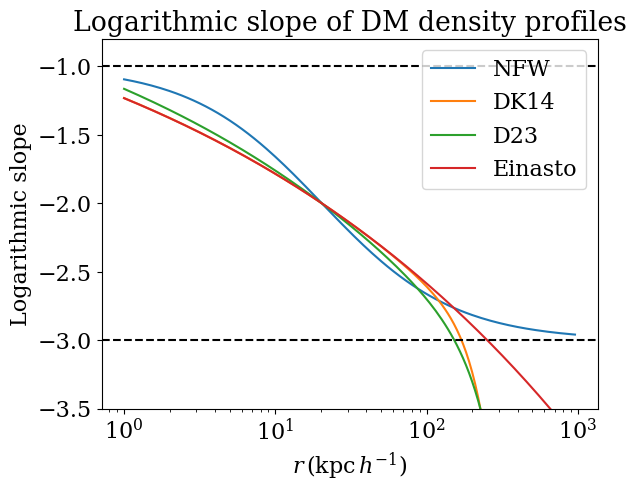

In [26]:
plt.figure()
plt.xscale('log')
plt.xlabel(r"$r\, (\mathrm{kpc} \, h^{-1})$")
plt.ylabel('Logarithmic slope')
plt.plot(r, p_nfw.densityDerivativeLog(r), '-', label='NFW');
plt.plot(r, p_dk14.densityDerivativeLog(r), '-', label='DK14');
plt.plot(r, p_d23.densityDerivativeLog(r), '-', label='D23');
plt.plot(r, p_ens.densityDerivativeLog(r), '-', label='Einasto');
plt.ylim(-3.5, -0.8)
plt.title('Logarithmic slope of DM density profiles')
plt.axhline(-3, color='k', linestyle='--')
plt.axhline(-1, color='k', linestyle='--')
plt.legend();

## Visibile matter mass model-I from Pouliasis+2017 (see table1) 
### Baryonic contribution is fixed to Pouliasis+17 Model-I:
 - $\Phi_{tot}(R, z) = \Phi_{bulge}(r) + \Phi_{thin}(R, z), \Phi_{thick}(R, z) + \Phi_{halo}(r)$ 
 - $\Phi_{thin \, / \, thick}$ - Miyamoto-Nagai 
 - $\Phi_{bulge}$ - Plummer 
 - $\Phi_{halo}$ - WE FIT FOR THIS

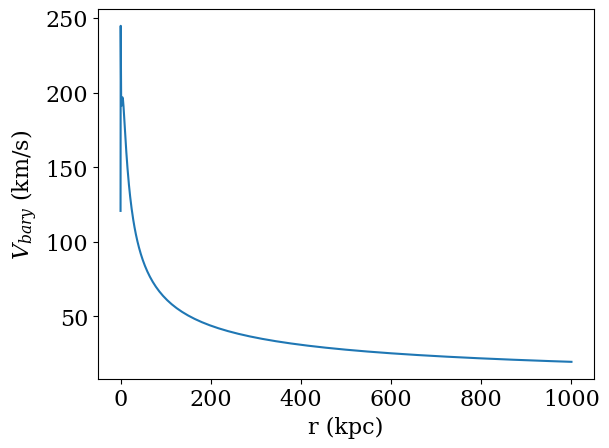

In [10]:
G = 4.302*1.0e-6 # (kpc/Msun) (km/s)^2
def Vbary(r):
    mp_thin = MiyamotoNagaiPotential(amp=G*2.32*1e7*1700.0, a=5.3, b=0.25, normalize=False)
    mp_thick = MiyamotoNagaiPotential(amp=G*2.32*1e7*1700.0, a=2.6, b=0.8, normalize=False)
    pl_bulge = PlummerPotential(amp=G*2.32*1e7*460., b=0.3, normalize=False)
    
    return np.sqrt(mp_thin.vcirc(r)**2 + mp_thick.vcirc(r)**2 + pl_bulge.vcirc(r)**2)

r = np.logspace(-1, 3, 200)
plt.plot(r, Vbary(r))
plt.xlabel('r (kpc)')
plt.ylabel('$V_{bary}$ (km/s)');

# Rotation Curve Data
We are using Eilers data from 5 to 25 kpc and beyond that LPV data from 25 to 1200 kpc



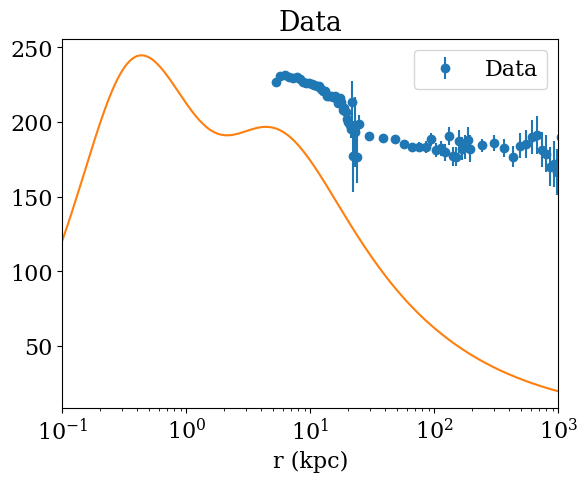

In [11]:
data = np.loadtxt(r'C:\Amogh\Research\TIFR Project\MW_splashback\data files\lpv_mpc_with_eilers_till_1200kpc.txt', unpack=True)
r_val = data[0] # kpc
v_tot = data[1] # km/s
v_err_tot = data[2] # km/s
plt.errorbar(r_val, v_tot, yerr=v_err_tot, fmt='o', label='Data')
plt.plot(r, Vbary(r))

plt.xlabel('r (kpc)')
plt.xlim(0.1, 1000)
plt.xscale('log')
plt.legend()
plt.title('Data');

### Subtracting the baryonic contribution
- $M_{dm} = V_{dm}^2 \, r/G$  
- $\Delta M_{dm}/M_{dm} = 2 \Delta V_{dm}/V_{dm}$  
- $\Delta V_{dm} = \Delta V_{tot}$  - NOTICE THIS ASSUMPTION!

### We will cutoff data at 800kpc

In [12]:
#Restricting the data to 800 kpc
r = data[0][data[0] <= 800] # kpc
v_tot = data[1][data[0] <= 800] # km/s
v_err_tot = data[2][data[0] <= 800] # km/s

#Removing the Baryonic contribution from the data
v_bary = Vbary(r) # km/s
v_dm = np.sqrt(v_tot**2 - v_bary**2) # km/s
v_err_dm = v_err_tot # km/s (assumption!)

#Calculating the mass of the DM halo
M_dm = (v_dm**2 * r) / G # Msun
M_err_dm = M_dm * (2 * v_err_dm/v_dm) #Msun

#Calculating the mass of the baryonic halo
M_bary = (v_bary**2 * r) / G # Msun

#Calculating the total mass of the halo
M_tot = (v_tot**2 * r) / G # Msun
M_err_tot = M_tot * (2 * v_err_tot/v_tot) #Msun

M_tot_1 = M_dm + M_bary # Msun



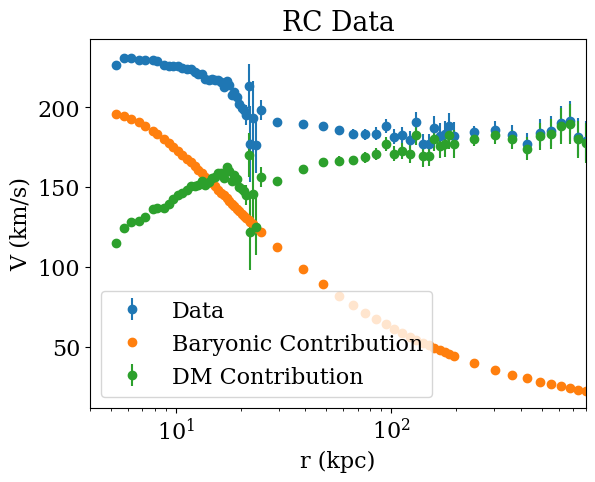

In [13]:
#plotting the RC data with and without the baryonic contribution
plt.figure()
plt.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', label='Data')
plt.errorbar(r, v_bary, fmt='o', label='Baryonic Contribution')
plt.errorbar(r, v_dm, yerr=v_err_dm, fmt='o', label='DM Contribution')
plt.xlabel('r (kpc)')
plt.ylabel('V (km/s)')
plt.xscale('log')
plt.xlim(4, 800)
plt.legend()
plt.title('RC Data');

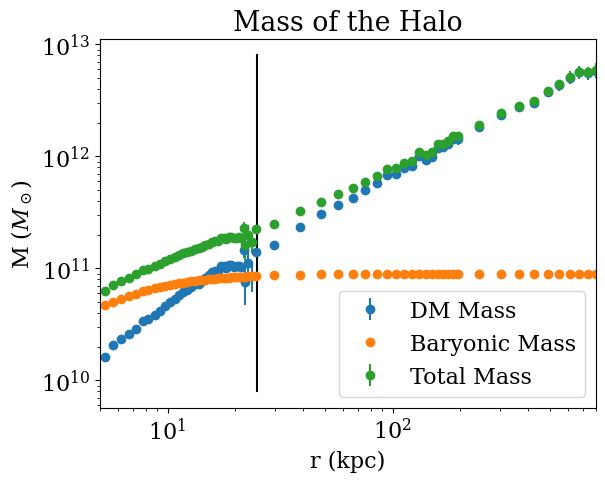

In [19]:
#plotting the data which is converted to mass 
plt.figure()
plt.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', label='DM Mass')
plt.errorbar(r, M_bary, fmt='o', label='Baryonic Mass')
plt.errorbar(r, M_tot, yerr=M_err_tot, fmt='o', label='Total Mass')
plt.xlabel(r'r (kpc)')
plt.ylabel(r'M ($M_\odot$)')
plt.xlim(5, 800)
plt.plot([25]*2, [8e9, 8e12], c='k')
plt.loglog()
plt.title('Mass of the Halo')
plt.legend();


## Fitting NFW, DK14, D23, Einasto using leastsq method of colossus.fit() 

 - No. of parameters: NFW (2 params), DK14 (6 params), D23 (5 params), Einasto (3 params)  
 - Here the initial guess values of the parameters are fixed to the parameters printed in code cell 2

In [32]:
h = 0.6766 # Hubble constant

# NFW Model

In [33]:
# NFW Profile
# intial guess for the parameters are taken from the values of the parameters obtained before

#intial guess for the parameters
rhos = 6378795.928070417
rs = 20.311309856581044

pnfw = profile_nfw.NFWProfile(rhos = rhos, rs = rs, mdef='200m')
pnfw_fit = pnfw.fit(r/h, M_dm/h, 'M', q_err=M_err_dm/h, method='leastsq')
pnfw.update()
M_dm_fit_nfw = pnfw_fit['q_fit']*h # Msun
print ('NFW best fit R200:', pnfw.RDelta(z, mdef='200m'))


-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity M.
Found solution in 7 steps. Best-fit parameters:
Parameter       rhos = 3.49e+06 [3.19e+06 .. 3.81e+06]
Parameter         rs = 2.68e+01 [2.53e+01 .. 2.83e+01]
chi2 / Ndof = 1090.5 / 65 = 16.78
-------------------------------------------------------------------------------------
NFW best fit R200: 256.6776577498871


In [34]:
#Calculating the local DM density at sun using the best fit parameters
R_sun = 8.2 # kpc
rhos_fit = pnfw_fit['x'][0]
rs_fit = pnfw_fit['x'][1]
rho_at_sun = pnfw.density(R_sun/h)/h**2 # Msun kpc^-3

#convert from Msun kpc^-3 to GeV cm^-3
GeVcm3_to_Msunkpc3 = 2.685e7  # GeV/cm^3 to M_sun/kpc^3
Msun_kpc3_to_GeVcm3 = 1.0 / GeVcm3_to_Msunkpc3
rho_at_sun = rho_at_sun * Msun_kpc3_to_GeVcm3 # GeV cm^-3
print ('NFW density at sun:', rho_at_sun, 'GeV cm^-3')
print ('NFW best fit parameters:', pnfw_fit['x'])

NFW density at sun: 0.29703342385851633 GeV cm^-3
NFW best fit parameters: [3.48647167e+06 2.67786272e+01]


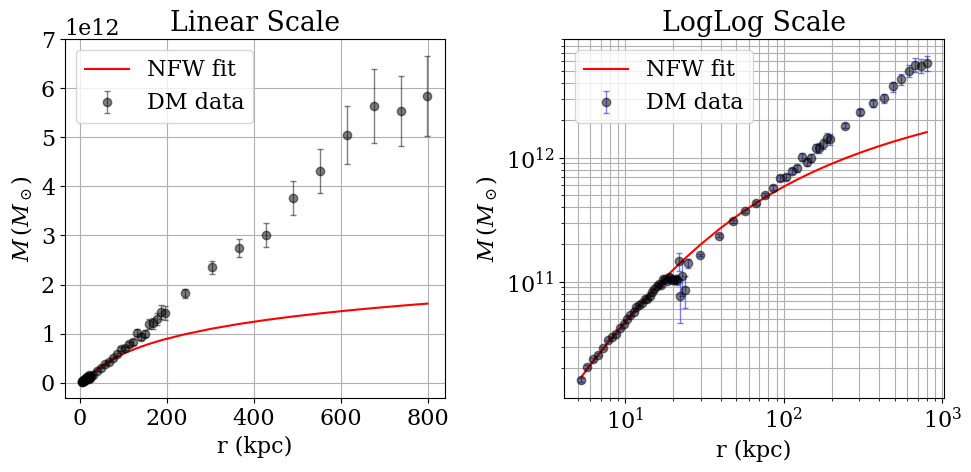

In [35]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: Linear Scale
ax1 = axes[0]
ax1.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, M_dm_fit_nfw, '-', color='red', label='NFW fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$M \, (M_\odot)$')
ax1.set_title('Linear Scale')
ax1.legend()
ax1.grid(True)

# Plot 2: LogLog Scale
ax2 = axes[1]
ax2.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, M_dm_fit_nfw, '-', color='red', label='NFW fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$M \, (M_\odot)$')
ax2.set_title('LogLog Scale')
ax2.loglog()
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

### Using three diffrenet datasets, using eilers+extended LPV, exended lPV alone and LP restricted from 25 to 200 kpc

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity M.
Found solution in 8 steps. Best-fit parameters:
Parameter       rhos = 3.64e+05 [3.20e+05 .. 4.14e+05]
Parameter         rs = 8.82e+01 [8.20e+01 .. 9.49e+01]
chi2 / Ndof = 121.2 / 27 = 4.49
-------------------------------------------------------------------------------------
NFW best fit R200: 318.79781930036927
-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity M.
Found solution in 8 steps. Best-fit parameters:
Parameter       rhos = 6.00e+05 [5.48e+05 .. 6.57e+05]
Parameter         rs = 6.57e+01 [6.24e+01 .. 6.91e+01]
chi2 / Ndof = 18.9 / 17 = 1.11
-------------------------------------------------------------------------------------


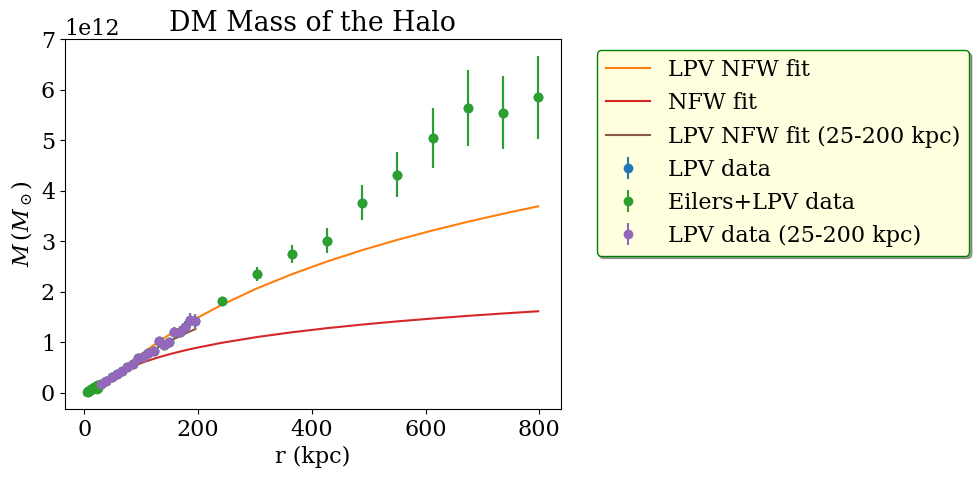

In [36]:
'''Restricting the data from 25kpc to 800 kpc'''
radial_condition = (25 <= data[0]) & (data[0] <= 800) # kpc
r_lpv = data[0][radial_condition]
v_lpv_tot = data[1][radial_condition] # km/s
v_err_lpv_tot = data[2][radial_condition] # km/s

#Removing the Baryonic contribution from the data
v_lpv_bary = Vbary(r_lpv) # km/s
v_dm_lpv = np.sqrt(v_lpv_tot**2 - v_lpv_bary**2) # km/s
v_err_lpv_dm = v_err_lpv_tot # km/s (assumption!)

#Calculating the mass of the DM halo
M_dm_lpv = (v_dm_lpv**2 * r_lpv) / G # Msun
M_err_lpv_dm = M_dm_lpv * (2 * v_err_lpv_dm/v_dm_lpv) #Msun

# NFW Profile
# intial guess for the parameters are taken from the values of the parameters obtained before

#intial guess for the parameters
rhos = 6378795.928070417
rs = 20.311309856581044
pnfw = profile_nfw.NFWProfile(rhos = rhos, rs = rs, mdef='200m')
pnfw_fit = pnfw.fit(r_lpv/h, M_dm_lpv/h, 'M', q_err=M_err_lpv_dm/h, method='leastsq')
pnfw.update()
M_dm_lpv_fit_nfw = pnfw_fit['q_fit']*h # Msun
print ('NFW best fit R200:', pnfw.RDelta(z, mdef='200m'))


'''Restricting the data from 25kpc to 200 kpc'''
radial_condition = (25 <= data[0]) & (data[0] <= 200) # kpc
r_lpv_1 = data[0][radial_condition]
v_lpv_tot_1 = data[1][radial_condition] # km/s
v_err_lpv_tot_1 = data[2][radial_condition] # km/s

#Removing the Baryonic contribution from the data
v_lpv_bary_1 = Vbary(r_lpv_1) # km/s
v_dm_lpv_1 = np.sqrt(v_lpv_tot_1**2 - v_lpv_bary_1**2) # km/s
v_err_lpv_dm_1 = v_err_lpv_tot_1 # km/s (assumption!)

#Calculating the mass of the DM halo
M_dm_lpv_1 = (v_dm_lpv_1**2 * r_lpv_1) / G # Msun
M_err_lpv_dm_1 = M_dm_lpv_1 * (2 * v_err_lpv_dm_1/v_dm_lpv_1) #Msun

# NFW Profile
# intial guess for the parameters are taken from the values of the parameters obtained before

#intial guess for the parameters
rhos = 6378795.928070417
rs = 20.311309856581044
pnfw = profile_nfw.NFWProfile(rhos = rhos, rs = rs, mdef='200m')
pnfw_fit = pnfw.fit(r_lpv_1/h, M_dm_lpv_1/h, 'M', q_err=M_err_lpv_dm_1/h, method='leastsq')
pnfw.update()
M_dm_lpv_fit_nfw_1 = pnfw_fit['q_fit']*h # Msun


#Overplot the DM data with the best fit
plt.figure()
plt.errorbar(r_lpv, M_dm_lpv, yerr=M_err_lpv_dm, fmt='o', label='LPV data')
plt.plot(r_lpv, M_dm_lpv_fit_nfw, '-', label='LPV NFW fit')
plt.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', label='Eilers+LPV data')
plt.plot(r, M_dm_fit_nfw, '-', label='NFW fit')
plt.errorbar(r_lpv_1, M_dm_lpv_1, yerr=M_err_lpv_dm_1, fmt='o', label='LPV data (25-200 kpc)')
plt.plot(r_lpv_1, M_dm_lpv_fit_nfw_1, '-', label='LPV NFW fit (25-200 kpc)')
plt.xlabel('r (kpc)')
#plt.xlim(25, 210)
plt.ylabel(r'$M \, (M_\odot)$')
plt.title('DM Mass of the Halo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='lightyellow', edgecolor='green', shadow=True)
plt.show()



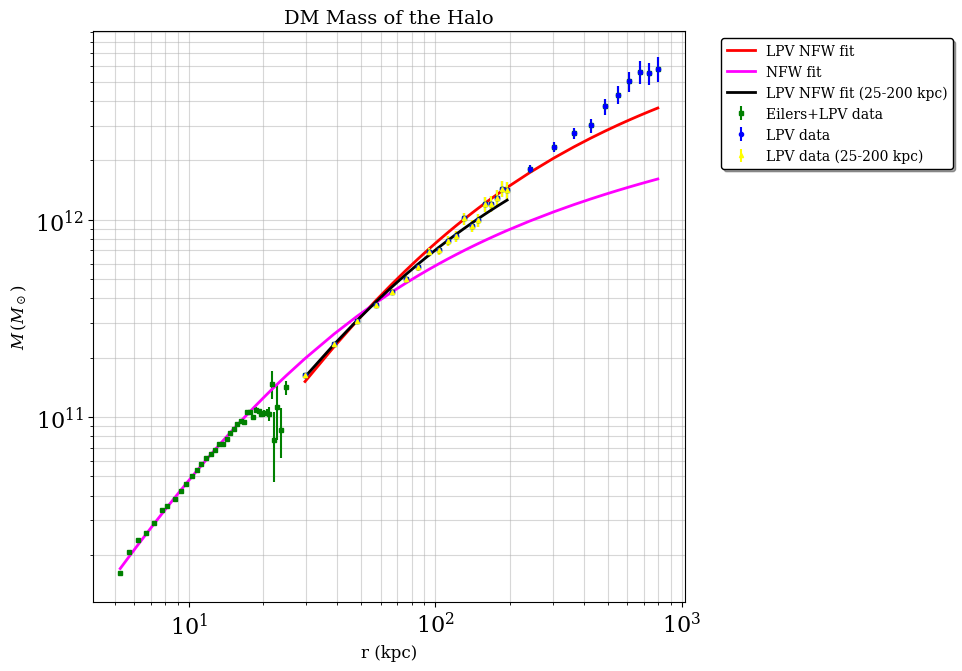

In [37]:
# Plot the DM data with the best fit in the log-log scale
# Using a different color scheme for better visibility
plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
plt.plot(r_lpv, M_dm_lpv_fit_nfw, '-', color='red', linewidth=2, label='LPV NFW fit')
plt.errorbar(r, M_dm, yerr=M_err_dm, fmt='s', color='green', markersize=3, label='Eilers+LPV data')
plt.errorbar(r_lpv, M_dm_lpv, yerr=M_err_lpv_dm, fmt='o', color='blue', markersize=3, label='LPV data')
plt.plot(r, M_dm_fit_nfw, '-', color='magenta', linewidth=2, label='NFW fit')
plt.errorbar(r_lpv_1, M_dm_lpv_1, yerr=M_err_lpv_dm_1, fmt='^', color='yellow', markersize=3, label='LPV data (25-200 kpc)')
plt.plot(r_lpv_1, M_dm_lpv_fit_nfw_1, '-', color='black', linewidth=2, label='LPV NFW fit (25-200 kpc)') # Using a different linestyle

plt.xlabel('r (kpc)', fontsize=12)
plt.ylabel(r'$M \, (M_\odot)$', fontsize=12)
plt.title('DM Mass of the Halo', fontsize=14)
plt.loglog()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='white', edgecolor='black', shadow=True, fontsize=10) # Improved legend appearance
plt.grid(True, which="both", ls="-", alpha=0.5) # Adding a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

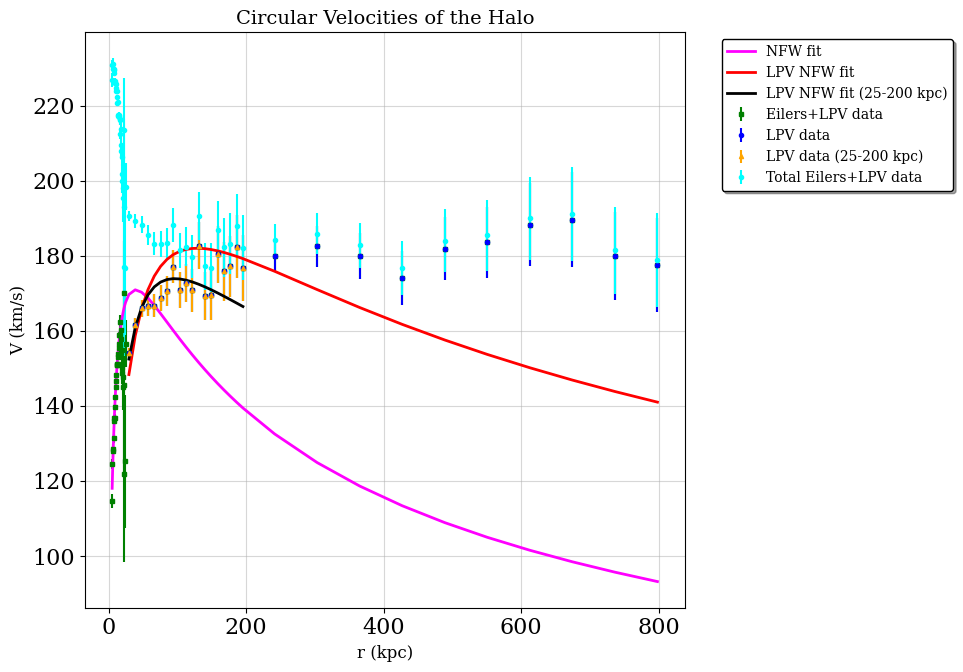

In [61]:
# Overplotting the circular velocities with the fits
v_dm_lpv_fit_nfw = np.sqrt(G * M_dm_lpv_fit_nfw / r_lpv) # km/s
v_dm_lpv_fit_nfw_1 = np.sqrt(G * M_dm_lpv_fit_nfw_1 / r_lpv_1) # km/s
v_tot_lpv_fit_nfw = np.sqrt(G * M_dm_lpv_fit_nfw / r_lpv + Vbary(r_lpv)**2) # km/s
v_tot_lpv_fit_nfw_1 = np.sqrt(G * M_dm_lpv_fit_nfw_1 / r_lpv_1 + Vbary(r_lpv_1)**2) # km/s
v_dm_fit_nfw = np.sqrt(G * M_dm_fit_nfw / r) # km/s



plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
plt.errorbar(r, v_dm, yerr=v_err_dm, fmt='s', color='green', markersize=3, label='Eilers+LPV data')
plt.errorbar(r_lpv, v_dm_lpv, yerr=v_err_lpv_dm, fmt='o', color='blue', markersize=3, label='LPV data')
plt.errorbar(r_lpv_1, v_dm_lpv_1, yerr=v_err_lpv_dm_1, fmt='^', color='orange', markersize=3, label='LPV data (25-200 kpc)')
plt.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', color='cyan', markersize=3, label='Total Eilers+LPV data')
plt.plot(r, v_dm_fit_nfw, '-', color='magenta', linewidth=2, label='NFW fit')
plt.plot(r_lpv, v_dm_lpv_fit_nfw, '-', color='red', linewidth=2, label='LPV NFW fit')
plt.plot(r_lpv_1, v_dm_lpv_fit_nfw_1, '-', color='black', linewidth=2, label='LPV NFW fit (25-200 kpc)') # Using a different linestyle
plt.xlabel('r (kpc)', fontsize=12)
plt.ylabel('V (km/s)', fontsize=12)
plt.title('Circular Velocities of the Halo', fontsize=14)
# plt.xscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='white', edgecolor='black', shadow=True, fontsize=10) # Improved legend appearance
plt.grid(True, which="both", ls="-", alpha=0.5) # Adding a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

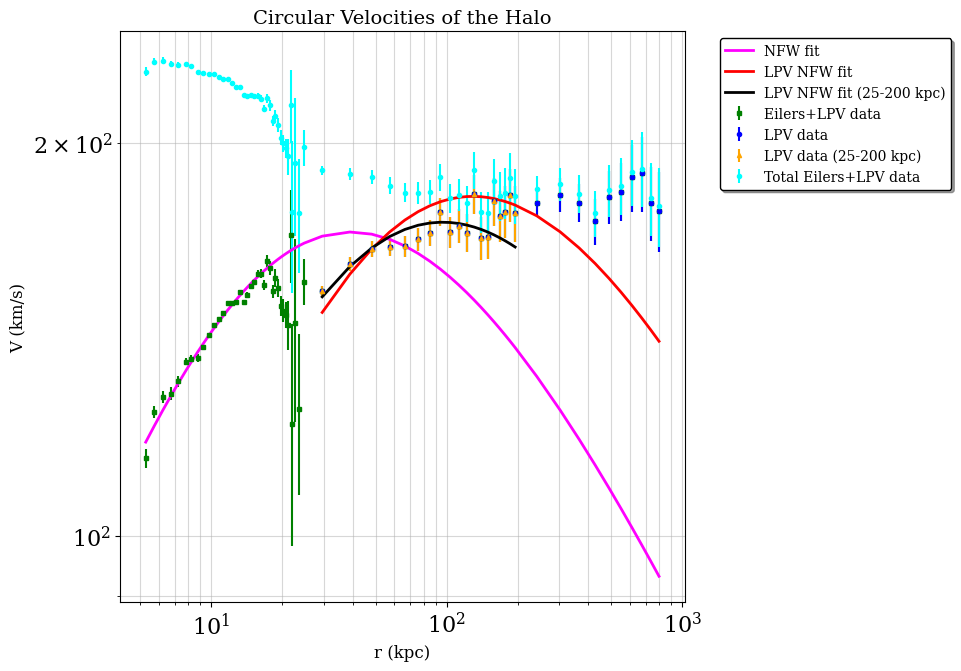

In [62]:
# Overplotting the circular velocities with the fits in log-log scale
v_dm_lpv_fit_nfw = np.sqrt(G * M_dm_lpv_fit_nfw / r_lpv) # km/s
v_dm_lpv_fit_nfw_1 = np.sqrt(G * M_dm_lpv_fit_nfw_1 / r_lpv_1) # km/s
v_tot_lpv_fit_nfw = np.sqrt(G * M_dm_lpv_fit_nfw / r_lpv + Vbary(r_lpv)**2) # km/s
v_tot_lpv_fit_nfw_1 = np.sqrt(G * M_dm_lpv_fit_nfw_1 / r_lpv_1 + Vbary(r_lpv_1)**2) # km/s


plt.figure(figsize=(10, 7)) # Adjust figure size for better readability
plt.errorbar(r, v_dm, yerr=v_err_dm, fmt='s', color='green', markersize=3, label='Eilers+LPV data')
plt.errorbar(r_lpv, v_dm_lpv, yerr=v_err_lpv_dm, fmt='o', color='blue', markersize=3, label='LPV data')
plt.errorbar(r_lpv_1, v_dm_lpv_1, yerr=v_err_lpv_dm_1, fmt='^', color='orange', markersize=3, label='LPV data (25-200 kpc)')
plt.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', color='cyan', markersize=3, label='Total Eilers+LPV data')
plt.plot(r, v_dm_fit_nfw, '-', color='magenta', linewidth=2, label='NFW fit')
plt.plot(r_lpv, v_dm_lpv_fit_nfw, '-', color='red', linewidth=2, label='LPV NFW fit')
plt.plot(r_lpv_1, v_dm_lpv_fit_nfw_1, '-', color='black', linewidth=2, label='LPV NFW fit (25-200 kpc)') # Using a different linestyle
plt.loglog()
plt.xlabel('r (kpc)', fontsize=12)
plt.ylabel('V (km/s)', fontsize=12)
plt.title('Circular Velocities of the Halo', fontsize=14)
# plt.xscale('log')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           bbox_transform=plt.gca().transAxes,
           frameon=True,
           facecolor='white', edgecolor='black', shadow=True, fontsize=10) # Improved legend appearance
plt.grid(True, which="both", ls="-", alpha=0.5) # Adding a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

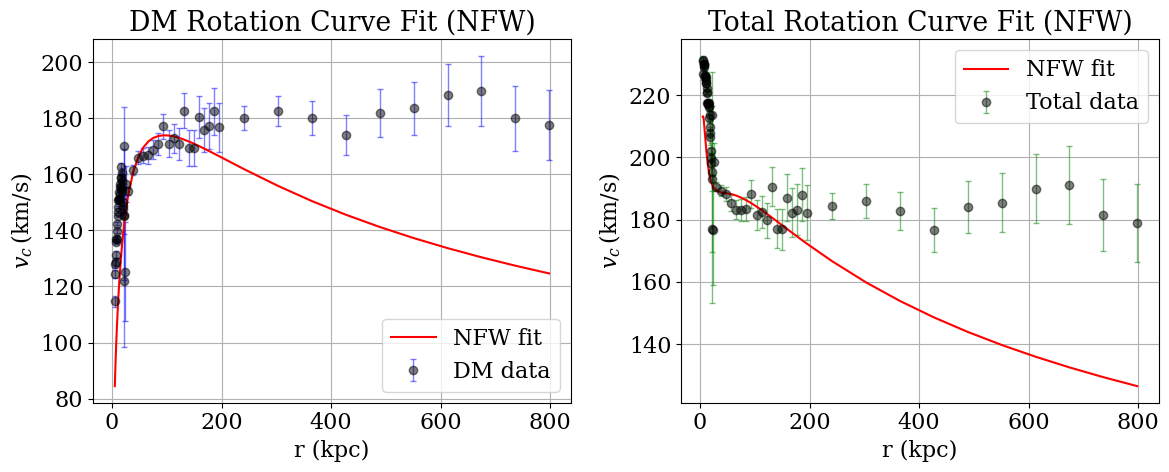

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Obtain the circular velocity from the NFW profile
v_dm_fit_nfw = pnfw.circularVelocity(r / h)  # km/s
v_tot_fit_nfw = np.sqrt(v_dm_fit_nfw**2 + v_bary**2)  # km/s

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: DM RC Fit
ax1 = axes[0]
ax1.errorbar(r, v_dm, yerr=v_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, v_dm_fit_nfw, '-', color='red', label='NFW fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax1.set_title('DM Rotation Curve Fit (NFW)')  # More descriptive title
ax1.legend()
ax1.grid(True)

# Plot 2: Total RC Fit (LogLog Scale)
ax2 = axes[1]
ax2.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', color='black', label='Total data', ecolor='green', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, v_tot_fit_nfw, '-', color='red', label='NFW fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax2.set_title('Total Rotation Curve Fit (NFW)')
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

# DK14 Model

In [41]:
#DK14 Profile
#intial guess for the parameters
rhos = 1469527.4991789383
rs = 20.31130985658104
rt = 434.7741388785323
alpha = 0.16127530367457624
beta = 4.0
gamma = 8.0
pdk14 = profile_dk14.DK14Profile(rhos = rhos, rs = rs, rt = rt, alpha = alpha, beta = beta, gamma = gamma, mdef='200m')
pdk14_fit = pdk14.fit(r/h, M_dm/h, 'M', q_err=M_err_dm/h, method='leastsq')
pdk14.update()
M_dm_fit_dk14 = pdk14_fit['q_fit']*h # Msun
print ('DK14 best fit R200:', pdk14.RDelta(z, mdef='200m'))

-------------------------------------------------------------------------------------
Profile fit: Varying 6 / 6 parameters.
Could not find analytical derivative function for quantity M.
c:\Users\sriva\OneDrive\Documents\Python\Python312\Lib\site-packages\colossus\halo\profile_dk14.py:293: RuntimeWarning: overflow encountered in scalar power
  fT = (1.0 + (r / self.par['rt'])**self.par['beta'])**(-self.par['gamma'] / self.par['beta'])

c:\Users\sriva\OneDrive\Documents\Python\Python312\Lib\site-packages\colossus\halo\profile_base.py:1876: UserWarning: Could not determine uncertainties on fitted parameters. Set all uncertainties to zero.
  warnings.warn('Could not determine uncertainties on fitted parameters. Set all uncertainties to zero.')

Found solution in 23 steps. Best-fit parameters:
Parameter       rhos = 1.72e+05 [0.00e+00 .. 0.00e+00]
Parameter         rs = 6.03e+01 [0.00e+00 .. 0.00e+00]
Parameter         rt = 7.68e+81 [0.00e+00 .. 0.00e+00]
Parameter      alpha = 9.49e-02 [0

In [42]:
#Calculating the local DM density at sun using the best fit parameters
rhos_fit = pdk14_fit['x'][0]
rs_fit = pdk14_fit['x'][1]
rt_fit = pdk14_fit['x'][2]
alpha_fit = pdk14_fit['x'][3]
beta_fit = pdk14_fit['x'][4]
gamma_fit = pdk14_fit['x'][5]

R_sun = 8.2 # kpc
rho_at_sun = pdk14.density(R_sun/h)/h**2 # Msun kpc^-3
#convert from Msun kpc^-3 to GeV cm^-3
GeVcm3_to_Msunkpc3 = 2.685e7  # GeV/cm^3 to M_sun/kpc^3
Msun_kpc3_to_GeVcm3 = 1.0 / GeVcm3_to_Msunkpc3
rho_at_sun = rho_at_sun * Msun_kpc3_to_GeVcm3 # GeV cm^-3
print ('DK14 density at sun:', rho_at_sun, 'GeV cm^-3')
print ('DK14 best fit parameters:', pdk14_fit['x'])

DK14 density at sun: 0.2746083984866168 GeV cm^-3
DK14 best fit parameters: [1.71900853e+05 6.03257126e+01 7.68451922e+81 9.49246251e-02
 1.97883557e+56 1.79722656e-38]


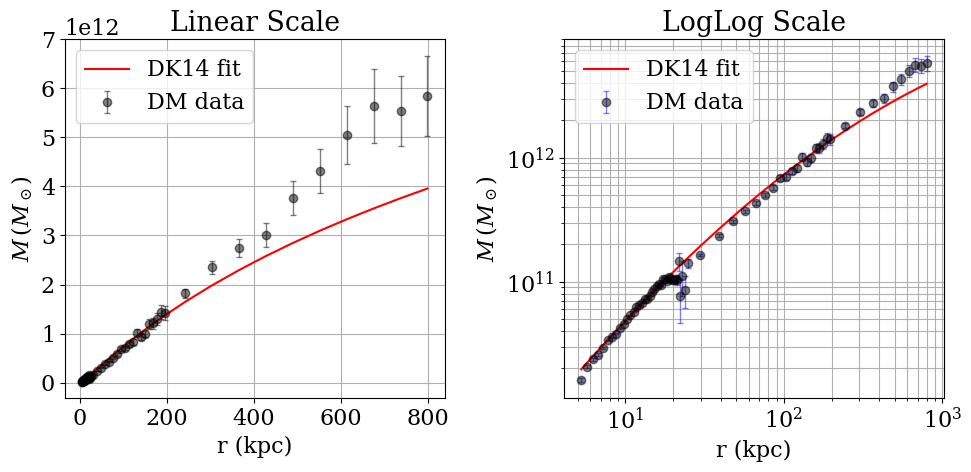

In [43]:
#Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: Linear Scale
ax1 = axes[0]
ax1.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, M_dm_fit_dk14, '-', color='red', label='DK14 fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$M \, (M_\odot)$')
ax1.set_title('Linear Scale')
ax1.legend()
ax1.grid(True)

# Plot 2: LogLog Scale
ax2 = axes[1]
ax2.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, M_dm_fit_dk14, '-', color='red', label='DK14 fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$M \, (M_\odot)$')
ax2.set_title('LogLog Scale')
ax2.loglog()
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

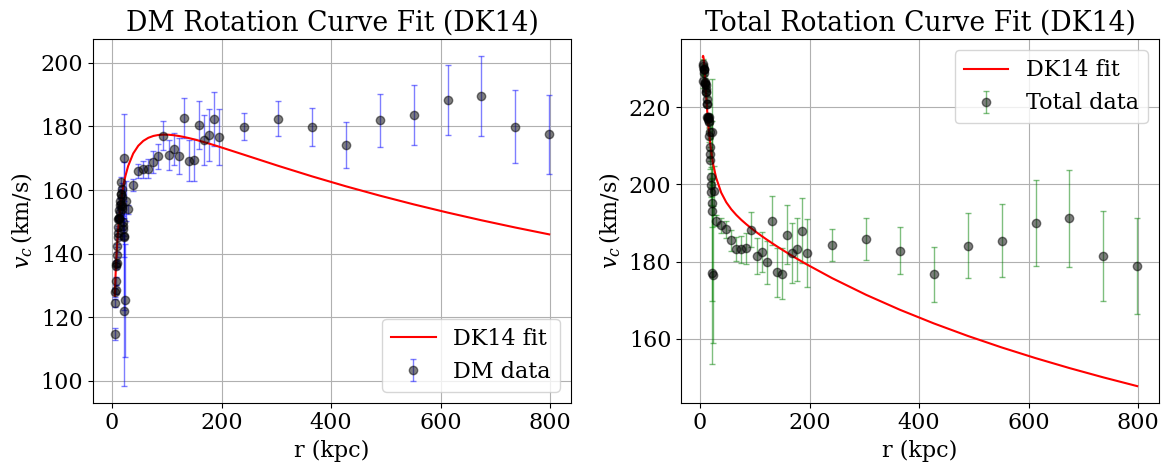

In [44]:
# Obtain the circular velocity from the DK14 profile
v_dm_fit_dk14 = pdk14.circularVelocity(r / h)  # km/s
v_tot_fit_dk14 = np.sqrt(v_dm_fit_dk14**2 + v_bary**2)  # km/s

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: DM RC Fit
ax1 = axes[0]
ax1.errorbar(r, v_dm, yerr=v_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, v_dm_fit_dk14, '-', color='red', label='DK14 fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax1.set_title('DM Rotation Curve Fit (DK14)')  # More descriptive title
ax1.legend()
ax1.grid(True)

# Plot 2: Total RC Fit (LogLog Scale)
ax2 = axes[1]
ax2.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', color='black', label='Total data', ecolor='green', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, v_tot_fit_dk14, '-', color='red', label='DK14 fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax2.set_title('Total Rotation Curve Fit (DK14)')
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

# Diemer23 Model

In [45]:
# D23 Profile
# intial guess for the parameters

rhos = 1546932.032461308
rs = 20.311309856581037
rt = 303.91481493355593
alpha = 0.18
beta = 3.0

pd23 = profile_diemer23.ModelAProfile(rhos = rhos, rs = rs, rt = rt, alpha = alpha, beta = beta, mdef='200m')
pd23_fit = pd23.fit(r/h, M_dm/h, 'M', q_err=M_err_dm/h, method='leastsq')
pd23.update()
M_dm_fit_d23 = pd23_fit['q_fit']*h # Msun
print ('D23 best fit R200:', pd23.RDelta(z, mdef='200m'))

-------------------------------------------------------------------------------------
Profile fit: Varying 5 / 5 parameters.
Could not find analytical derivative function for quantity M.
Found solution in 23 steps. Best-fit parameters:
Parameter       rhos = 1.72e+05 [0.00e+00 .. 0.00e+00]
Parameter         rs = 6.04e+01 [0.00e+00 .. 0.00e+00]
Parameter         rt = 3.22e+05 [0.00e+00 .. 0.00e+00]
Parameter      alpha = 9.49e-02 [0.00e+00 .. 0.00e+00]
Parameter       beta = 4.77e+03 [0.00e+00 .. 0.00e+00]
chi2 / Ndof = 594.2 / 62 = 9.58
-------------------------------------------------------------------------------------
D23 best fit R200: 309.9454051223159


In [46]:
# Calculating the local DM density at sun using the best fit parameters
rhos_fit = pd23_fit['x'][0]
rs_fit = pd23_fit['x'][1]
rt_fit = pd23_fit['x'][2]
alpha_fit = pd23_fit['x'][3]

R_sun = 8.2 # kpc
rho_at_sun = pd23.density(R_sun/h)/h**2 # Msun kpc^-3

#convert from Msun kpc^-3 to GeV cm^-3
GeVcm3_to_Msunkpc3 = 2.685e7  # GeV/cm^3 to M_sun/kpc^3
Msun_kpc3_to_GeVcm3 = 1.0 / GeVcm3_to_Msunkpc3
rho_at_sun = rho_at_sun * Msun_kpc3_to_GeVcm3 # GeV cm^-3
print ('D23 density at sun:', rho_at_sun, 'GeV cm^-3')

D23 density at sun: 0.2746014379305977 GeV cm^-3


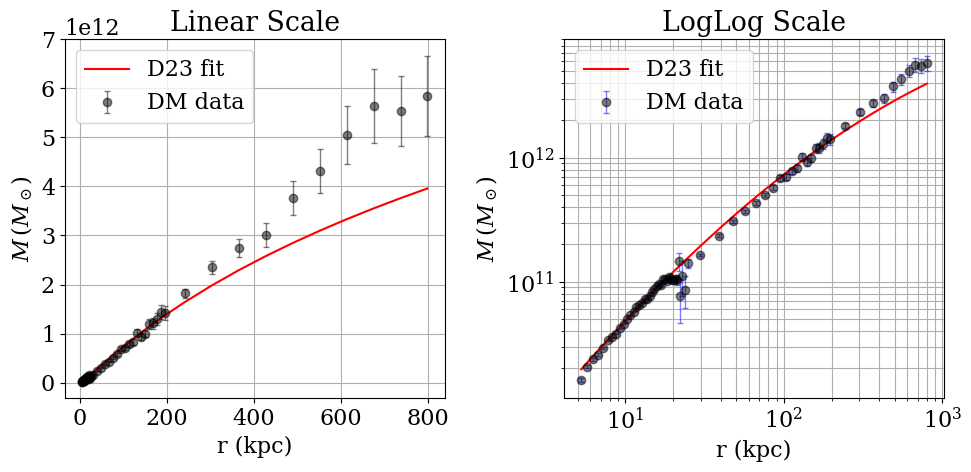

In [47]:
#Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, adjust figsize as needed
# Plot 1: Linear Scale
ax1 = axes[0]
ax1.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, M_dm_fit_d23, '-', color='red', label='D23 fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$M \, (M_\odot)$')
ax1.set_title('Linear Scale')
ax1.legend()
ax1.grid(True)

# Plot 2: LogLog Scale
ax2 = axes[1]
ax2.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, M_dm_fit_d23, '-', color='red', label='D23 fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$M \, (M_\odot)$')
ax2.set_title('LogLog Scale')
ax2.loglog()
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

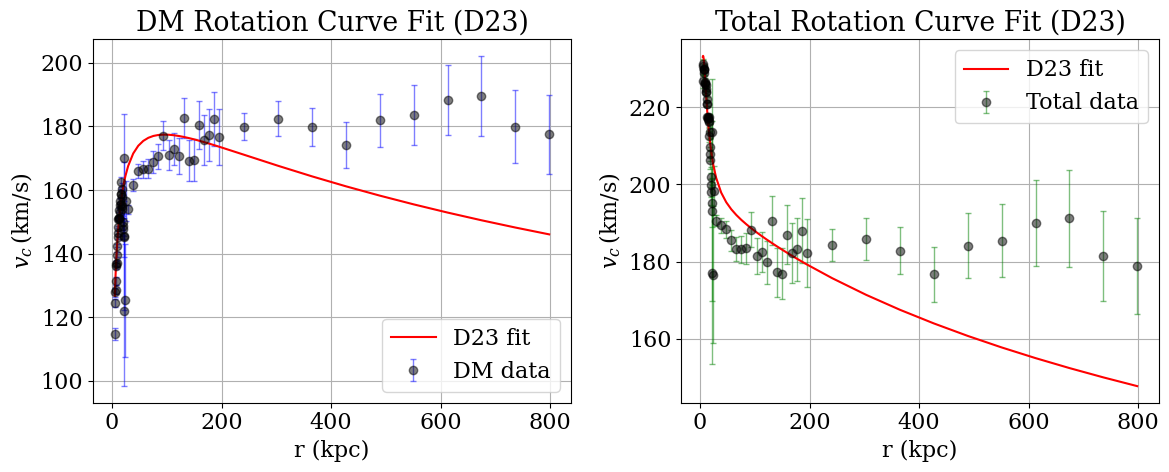

In [48]:
# Obtain the circular velocity from the DK14 profile
v_dm_fit_d23 = pdk14.circularVelocity(r / h)  # km/s
v_tot_fit_d23 = np.sqrt(v_dm_fit_dk14**2 + v_bary**2)  # km/s

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: DM RC Fit
ax1 = axes[0]
ax1.errorbar(r, v_dm, yerr=v_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, v_dm_fit_d23, '-', color='red', label='D23 fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax1.set_title('DM Rotation Curve Fit (D23)')  # More descriptive title
ax1.legend()
ax1.grid(True)

# Plot 2: Total RC Fit (LogLog Scale)
ax2 = axes[1]
ax2.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', color='black', label='Total data', ecolor='green', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, v_tot_fit_d23, '-', color='red', label='D23 fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax2.set_title('Total Rotation Curve Fit (D23)')
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


# Einasto Model

In [49]:
#Einasto Profile
#intial guess for the parameters

rhos = 1450301.4387155238
rs = 20.311309856581044
alpha = 0.1610981005232897

pein = profile_einasto.EinastoProfile(rhos = rhos, rs = rs, alpha = alpha, mdef='200m')
pein_fit = pein.fit(r/h, M_dm/h, 'M', q_err=M_err_dm/h, method='leastsq')
pein.update()
M_dm_fit_ein = pein_fit['q_fit']*h # Msun
print ('Einasto best fit R200:', pein.RDelta(z, mdef='200m'))


-------------------------------------------------------------------------------------
Profile fit: Varying 3 / 3 parameters.
Could not find analytical derivative function for quantity M.
Found solution in 8 steps. Best-fit parameters:
Parameter       rhos = 1.72e+05 [1.28e+05 .. 2.30e+05]
Parameter         rs = 6.04e+01 [5.18e+01 .. 7.03e+01]
Parameter      alpha = 9.49e-02 [8.36e-02 .. 1.08e-01]
chi2 / Ndof = 594.2 / 64 = 9.28
-------------------------------------------------------------------------------------
Einasto best fit R200: 309.94596907728754


In [50]:
#Calculating the local DM density at sun using the best fit parameters
rhos_fit = pein_fit['x'][0]
rs_fit = pein_fit['x'][1]
alpha_fit = pein_fit['x'][2]
R_sun = 8.2 # kpc
rho_at_sun = pein.density(R_sun/h)/h**2 # Msun kpc^-3
#convert from Msun kpc^-3 to GeV cm^-3
GeVcm3_to_Msunkpc3 = 2.685e7  # GeV/cm^3 to M_sun/kpc^3
Msun_kpc3_to_GeVcm3 = 1.0 / GeVcm3_to_Msunkpc3
rho_at_sun = rho_at_sun * Msun_kpc3_to_GeVcm3 # GeV cm^-3
print ('Einasto density at sun:', rho_at_sun, 'GeV cm^-3')

Einasto density at sun: 0.2746013068810809 GeV cm^-3


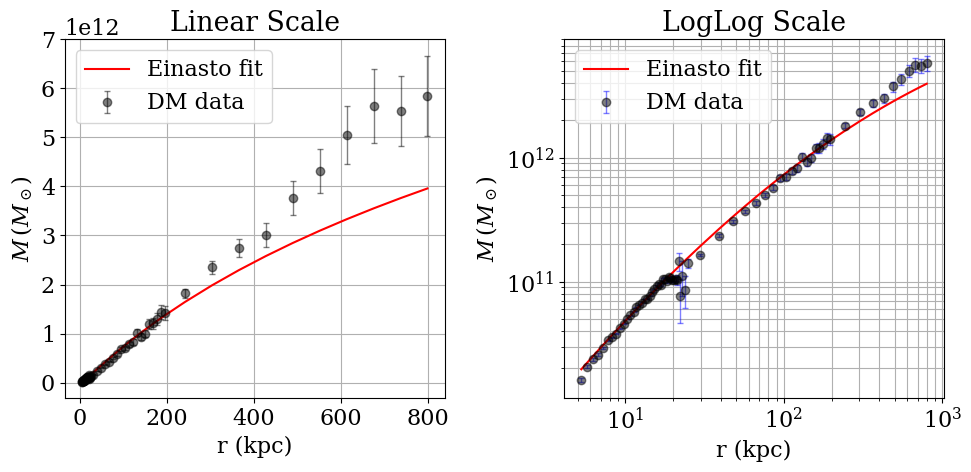

In [51]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: Linear Scale
ax1 = axes[0]
ax1.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, M_dm_fit_ein, '-', color='red', label='Einasto fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$M \, (M_\odot)$')
ax1.set_title('Linear Scale')
ax1.legend()
ax1.grid(True)

# Plot 2: LogLog Scale
ax2 = axes[1]
ax2.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, M_dm_fit_ein, '-', color='red', label='Einasto fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$M \, (M_\odot)$')
ax2.set_title('LogLog Scale')
ax2.loglog()
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()



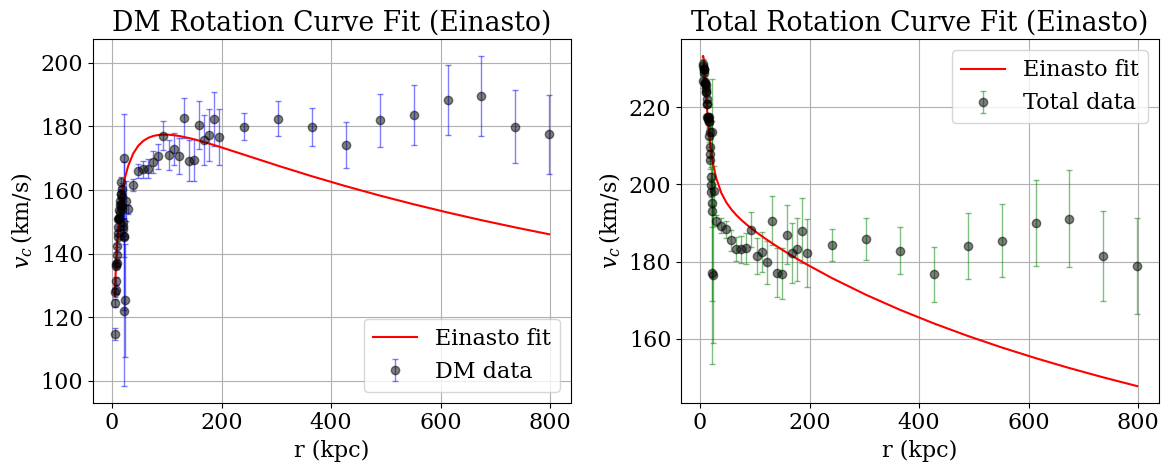

In [52]:
# Obtain the circular velocity from the Einasto profile
v_dm_fit_ein = pein.circularVelocity(r / h)  # km/s
v_tot_fit_ein = np.sqrt(v_dm_fit_ein**2 + v_bary**2)  # km/s

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: DM RC Fit
ax1 = axes[0]
ax1.errorbar(r, v_dm, yerr=v_err_dm, fmt='o', color='black', label='DM data', ecolor='blue', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, v_dm_fit_ein, '-', color='red', label='Einasto fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax1.set_title('DM Rotation Curve Fit (Einasto)')  # More descriptive title
ax1.legend()
ax1.grid(True)

# Plot 2: Total RC Fit (LogLog Scale)
ax2 = axes[1]
ax2.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', color='black', label='Total data', ecolor='green', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, v_tot_fit_ein, '-', color='red', label='Einasto fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$v_c \, (\mathrm{km/s})$')  # Corrected y-axis label
ax2.set_title('Total Rotation Curve Fit (Einasto)')
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

# Analysis of the DM profiles Together


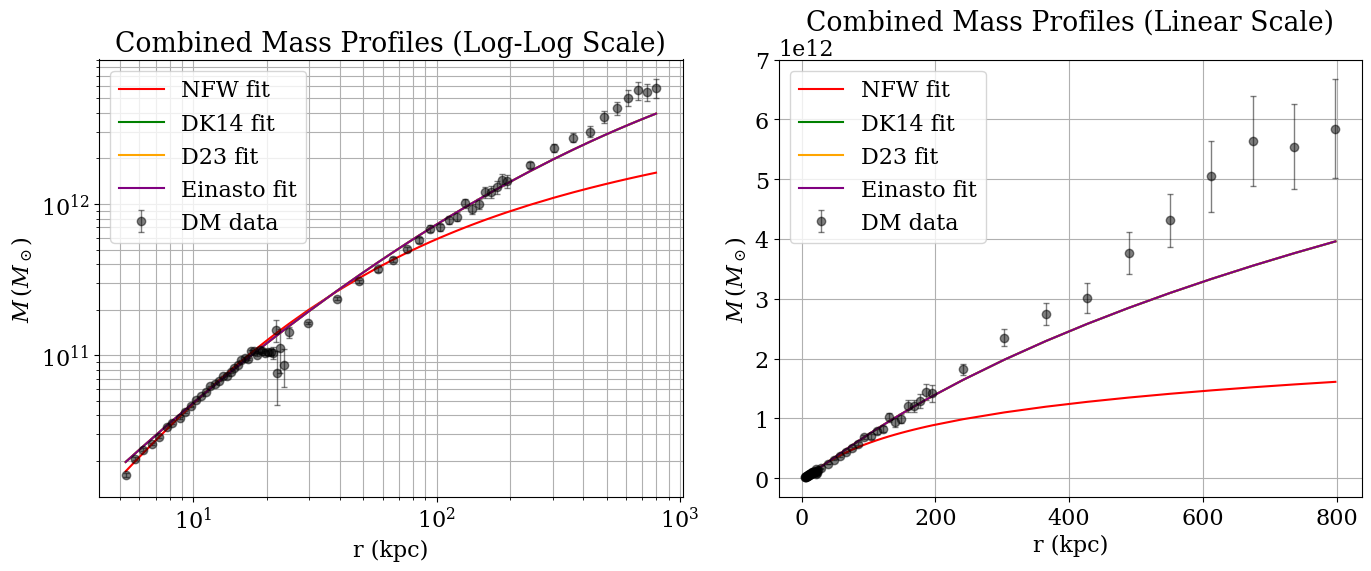

In [53]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: Log-Log Scale
ax1 = axes[0]
ax1.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, M_dm_fit_nfw, '-', color='red', label='NFW fit')
ax1.plot(r, M_dm_fit_dk14, '-', color='green', label='DK14 fit')
ax1.plot(r, M_dm_fit_d23, '-', color='orange', label='D23 fit')
ax1.plot(r, M_dm_fit_ein, '-', color='purple', label='Einasto fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$M \, (M_\odot)$')
ax1.set_title('Combined Mass Profiles (Log-Log Scale)')
ax1.legend()
ax1.loglog()
ax1.grid(True, which="both", ls="-")

# Plot 2: Linear Scale
ax2 = axes[1]
ax2.errorbar(r, M_dm, yerr=M_err_dm, fmt='o', color='black', label='DM data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, M_dm_fit_nfw, '-', color='red', label='NFW fit')
ax2.plot(r, M_dm_fit_dk14, '-', color='green', label='DK14 fit')
ax2.plot(r, M_dm_fit_d23, '-', color='orange', label='D23 fit')
ax2.plot(r, M_dm_fit_ein, '-', color='purple', label='Einasto fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$M \, (M_\odot)$')
ax2.set_title('Combined Mass Profiles (Linear Scale)')
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

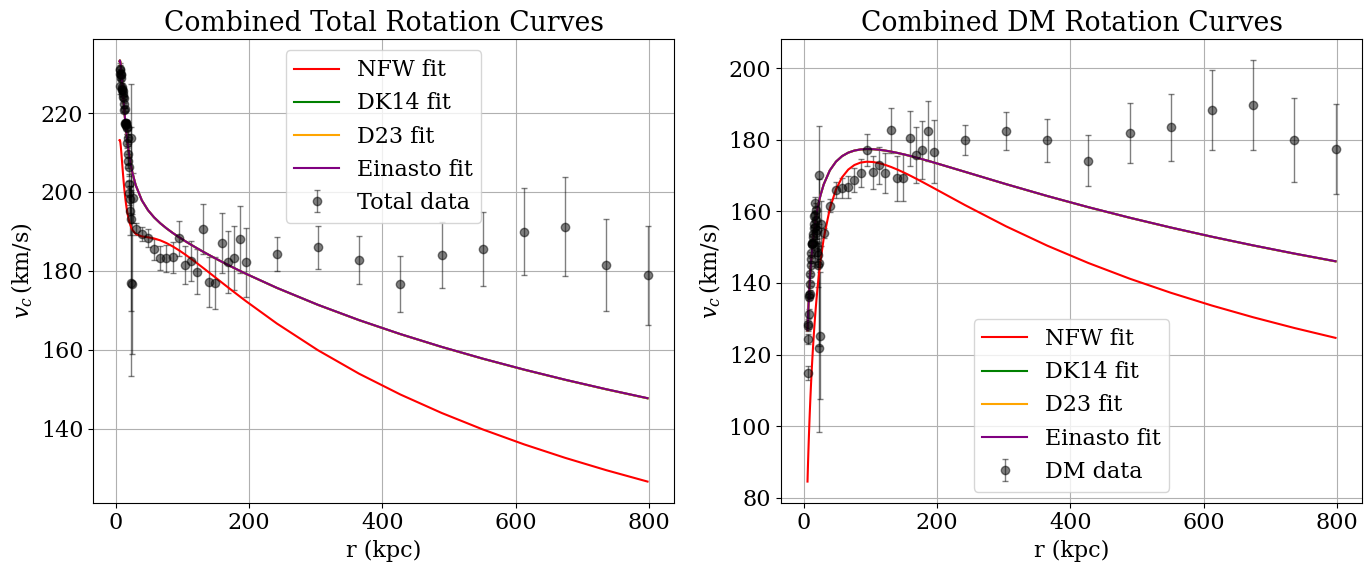

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns, adjust figsize as needed

# Plot 1: Combined Total Rotation Curves
ax1 = axes[0]
ax1.errorbar(r, v_tot, yerr=v_err_tot, fmt='o', color='black', label='Total data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax1.plot(r, v_tot_fit_nfw, '-', color='red', label='NFW fit')
ax1.plot(r, v_tot_fit_dk14, '-', color='green', label='DK14 fit')
ax1.plot(r, v_tot_fit_d23, '-', color='orange', label='D23 fit')
ax1.plot(r, v_tot_fit_ein, '-', color='purple', label='Einasto fit')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel(r'$v_c \, (\mathrm{km/s})$')
ax1.set_title('Combined Total Rotation Curves')
ax1.legend()
ax1.grid(True, which="both", ls="-")

# Plot 2: Combined DM Rotation Curves
ax2 = axes[1]
ax2.errorbar(r, v_dm, yerr=v_err_dm, fmt='o', color='black', label='DM data', ecolor='black', elinewidth=1, capsize=2, alpha=0.5)
ax2.plot(r, v_dm_fit_nfw, '-', color='red', label='NFW fit')
ax2.plot(r, v_dm_fit_dk14, '-', color='green', label='DK14 fit')
ax2.plot(r, v_dm_fit_d23, '-', color='orange', label='D23 fit')
ax2.plot(r, v_dm_fit_ein, '-', color='purple', label='Einasto fit')
ax2.set_xlabel('r (kpc)')
ax2.set_ylabel(r'$v_c \, (\mathrm{km/s})$')
ax2.set_title('Combined DM Rotation Curves')
ax2.legend()
ax2.grid(True, which="both", ls="-")

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()
